In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
cd '/content/drive/MyDrive/Kuliah/BDMA/HDA/Project/'

/content/drive/.shortcut-targets-by-id/13jj7NoQ_tDICfNStb7tKGN7_7PtOoS5P/Project


In [ ]:
pip install seaborn ncps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.1 MB/s eta 0:00:00


In [ ]:
pip install TSInterpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 22.3 MB/s eta 0:00:00


# Preprocess EEG Data

In [ ]:
import os
import scipy.io
import mne
import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data_path = './data/'

# Collect the label from the dataset
data_by_filename = {}
info_by_filename = {}

# Loop through each file in the directory
for file in os.listdir(data_path):
    if file.endswith('.mat') and "HaLT" in file:
        # Construct full file path
        file_path = os.path.join(data_path, file)

        # Load the .mat file
        mat_data = scipy.io.loadmat(file_path)

        # Extract data - adjust 'data_key' based on your file structure
        data = mat_data['o']['data']
        info = {}

        for name in mat_data['o'].dtype.names:
            if name != 'data':
                info[name] = mat_data['o'][name]


        # Extract label from file name
        label = file.replace('.mat', '')

        # Store data in the dictionary
        data_by_filename[label] = data
        info_by_filename[label] = info

print(data_by_filename.keys())


dict_keys(['HaLT-SubjectM-161117-6St-LRHandLegTongue', 'HaLT-SubjectM-161108-6St-LRHandLegTongue', 'HaLT-SubjectL-161116-6St-LRHandLegTongue', 'HaLT-SubjectK-161108-6St-LRHandLegTongue', 'HaLT-SubjectM-161124-6St-LRHandLegTongue', 'HaLT-SubjectL-161205-6St-LRHandLegTongue', 'HaLT-SubjectH-160722-6St-LRHandLegTongue', 'HaLT-SubjectI-160628-6St-LRHandLegTongue', 'HaLT-SubjectG-160412-6St-LRHandLegTongue', 'HaLT-SubjectH-160720-6St-LRHandLegTongue', 'HaLT-SubjectF-160203-6St-LRHandLegTongue', 'HaLT-SubjectE-160304-6St-LRHandLegTongue', 'HaLT-SubjectG-160322-6St-LRHandLegTongue', 'HaLT-SubjectF-160204-6St-LRHandLegTongue', 'HaLT-SubjectC-160224-6St-LRHandLegTongue', 'HaLT-SubjectE-160219-6St-LRHandLegTongue', 'HaLT-SubjectE-160226-6St-LRHandLegTongue', 'HaLT-SubjectC-160302-6St-LRHandLegTongue', 'HaLT-SubjectA-160308-6St-LRHandLegTongue', 'HaLT-SubjectA-160310-6St-LRHandLegTongue', 'HaLT-SubjectA-160223-6St-LRHandLegTongue', 'HaLT-SubjectB-160225-6St-LRHandLegTongue', 'HaLT-SubjectK-161027

[[ -0.    -0.    -0.   ... -13.56 -11.73 -10.87]
 [ -0.    -0.    -0.   ...  -8.24  -7.98  -8.27]
 [ -0.    -0.    -0.   ...  -2.04  -0.51  -1.71]
 ...
 [ -0.    -0.    -0.   ...  -0.87   0.61  -0.75]
 [ -0.    -0.    -0.   ...   1.87   5.11   3.21]
 [ -0.    -0.    -0.   ...   0.56   0.52   0.15]]
Creating RawArray with float64 data, n_channels=22, n_times=665400
    Range : 0 ... 665399 =      0.000 ...  3326.995 secs
Ready.
Using matplotlib as 2D backend.


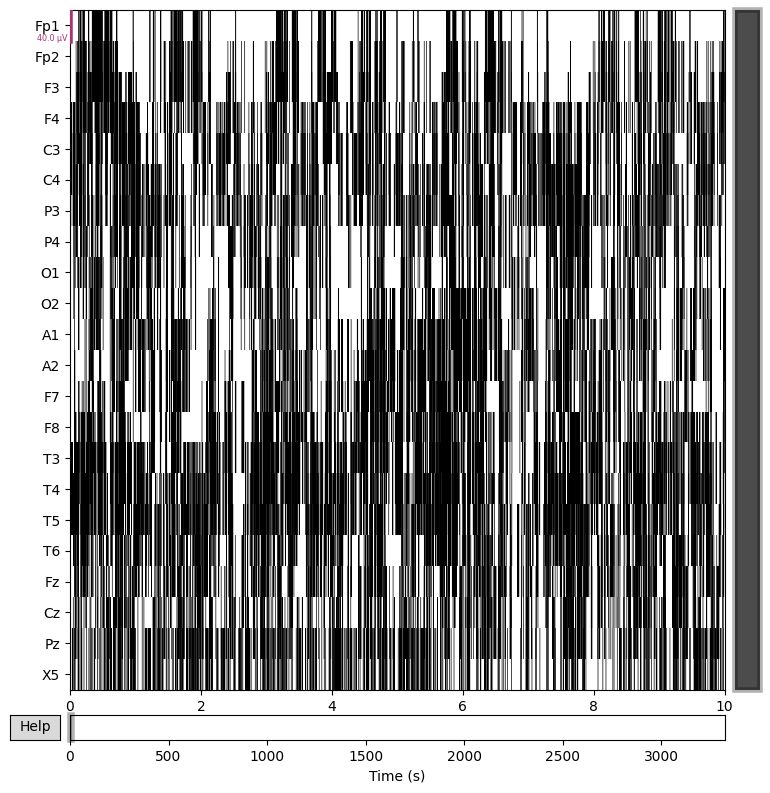

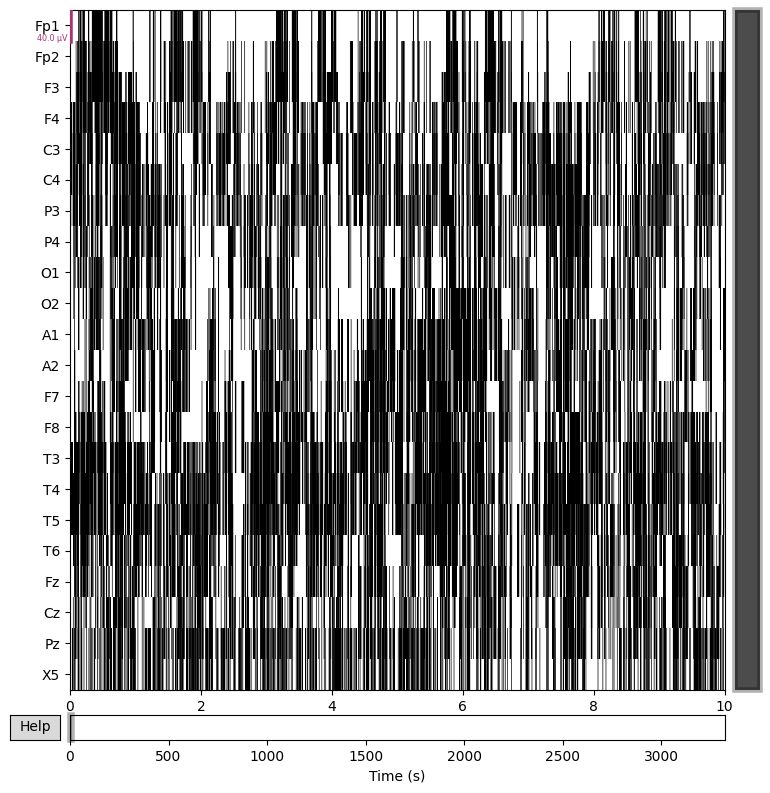

In [ ]:
label = 'HaLT-SubjectM-161117-6St-LRHandLegTongue'

ch_names = [el[0] for el in info_by_filename[label]['chnames'][0][0].flatten()]
sfreq = info_by_filename[label]['sampFreq']
data = data_by_filename[label]

channel_data = data[0][0].transpose()
print(channel_data)

info = mne.create_info(ch_names=ch_names, ch_types=["eeg"] * len(ch_names), sfreq=sfreq[0])

raw = mne.io.RawArray(channel_data, info)
# raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")
raw.crop(3)
raw.plot(n_channels=22, )

In [ ]:
### search for segment:
marker = [el[0] for el in info_by_filename[label]['marker'][0][0]]
segments = []
for i in range(len(marker)-1):
    if marker[i] == 0 and marker[i+1] > 0 and marker[i+1]:
        segments.append(i+1)
print(segments)

[31692, 32700, 33508, 34116, 34525, 35215, 35901, 36426, 37040, 37736, 38438, 39040, 39574, 40260, 40956, 41468, 42161, 42815, 43399, 43939, 44450, 44965, 45633, 46201, 46713, 47294, 47957, 48560, 49193, 49849, 50488, 51024, 51630, 52201, 52751, 53305, 53949, 54647, 55182, 55738, 56295, 56848, 57425, 57983, 58582, 59253, 59870, 60433, 61088, 61709, 62227, 62890, 63421, 64020, 64592, 65260, 65873, 66498, 67137, 67792, 68314, 69000, 69670, 70376, 70968, 71664, 72322, 72999, 73584, 74251, 74941, 75500, 76029, 76650, 77184, 77814, 78423, 78941, 79471, 80024, 80538, 81231, 81833, 82517, 83047, 83630, 84217, 84748, 85446, 85962, 86536, 87043, 87580, 88233, 88828, 89393, 89936, 90476, 91106, 91627, 92285, 92879, 93443, 94049, 94713, 95294, 95908, 96601, 97216, 97840, 98404, 98954, 99500, 100039, 100632, 101321, 101861, 102561, 103089, 103674, 104230, 104878, 105407, 105977, 106582, 107138, 107649, 108298, 108919, 109516, 110129, 110679, 111309, 111893, 112595, 113275, 113940, 114496, 115139, 

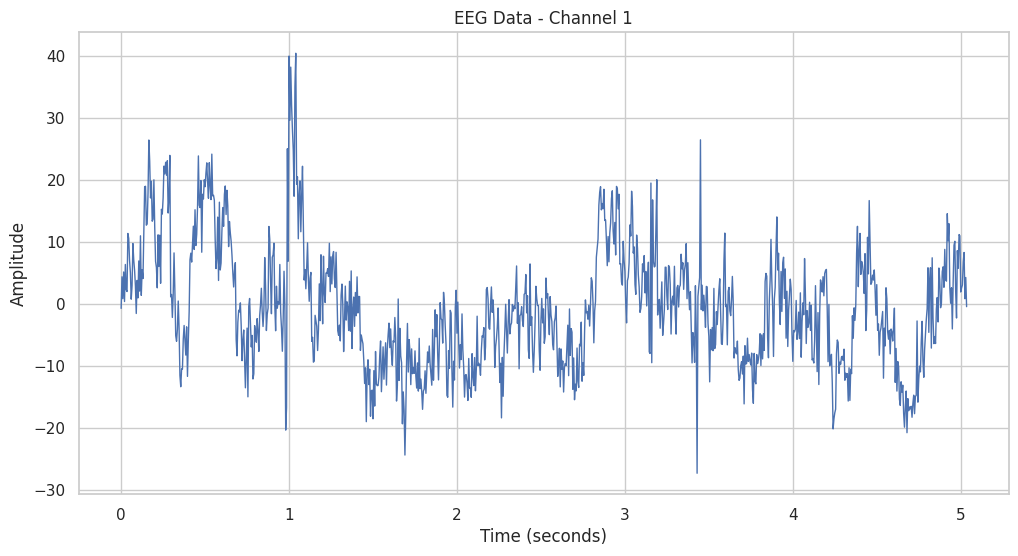

In [ ]:
time = np.arange(32700-31692) / sfreq[0]

# Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a figure and a plot
plt.figure(figsize=(12, 6))
plt.plot(time, channel_data[0, 31692:32700], linewidth=1)  # Adjust linewidth if needed

# Enhance readability
plt.grid(True)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('EEG Data - Channel 1')

plt.show()

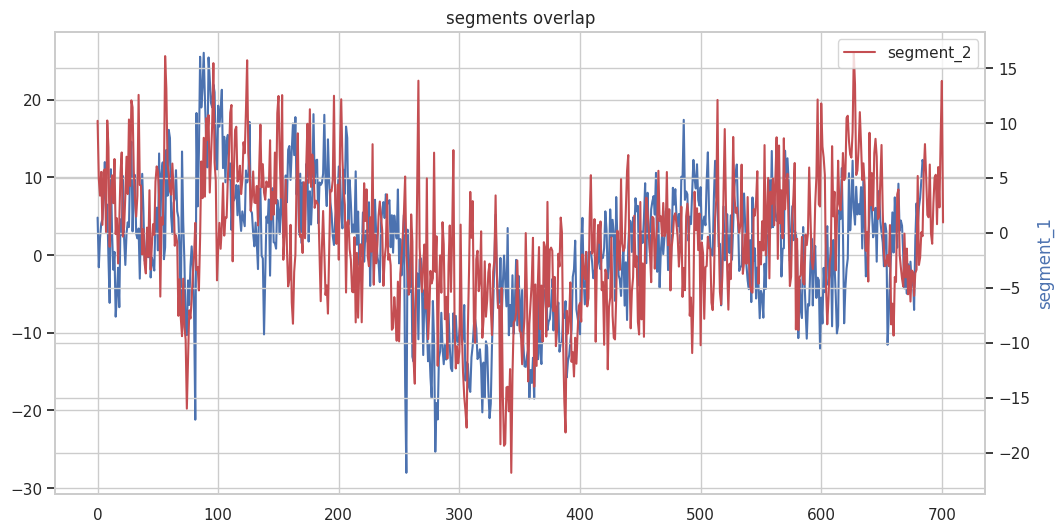

In [ ]:
def _get_data_helper(key, data):
    if key == "data":
      return data[0][0].transpose()

    if key == 'marker':
        return [el[0] for el in data[0][0]]

    if key == 'chnames':
        return [el[0] for el in data[0][0].flatten()]

    if key in {'sampFreq', 'nS'}:
      return data[0][0][0][0]

    if key == 'binsuV':
      return data[0][0][0][0]

    return data[0][0][0]

### Get the data, marker, and info about the dataset
def get_data(file):
      # Construct full file path
      file_path = os.path.join(data_path, file)

      # Load the .mat file
      mat_data = scipy.io.loadmat(file_path)
      info = {}

      for name in mat_data['o'].dtype.names:
          info[name] = _get_data_helper(name, mat_data['o'][name])
      return info

def _get_segment_data(marker):
    segments = []
    for i in range(len(marker)-1):
        if marker[i] == 0 and (marker[i+1] >= 1):
            segments.append(i+1)

    return segments

def get_segmented_data(data, marker, channels):
    segmented_data = {}
    segments = _get_segment_data(marker)

    for i in range(len(data)):
        segmented_data[channels[i]] = {}
        for j in range(len(segments)-1):
            start_idx = segments[j]
            end_idx = segments[j+1]

            if marker[segments[j]] > 90:
                continue

            if marker[segments[j]] in segmented_data[channels[i]]:
                segmented_data[channels[i]][marker[segments[j]]].append(data[i, start_idx:end_idx])
            else:
                segmented_data[channels[i]][marker[segments[j]]] = [data[i, start_idx:end_idx]]
        segmented_data[channels[i]][marker[segments[j]]].append(data[i, segments[j]:])

    return segmented_data

# Loop through each file in the directory
for file in os.listdir(data_path):
    if file.endswith('.mat') and "HaLT" in file:
        # Construct full file path
        info = get_data(file)
        segmented_data = get_segmented_data(info["data"], info["marker"], info["chnames"])

        # Seaborn style
        sns.set(style="whitegrid")

        # Create a figure for the plot
        plt.figure(figsize=(12, 6))

        # Plotting data
        plt.plot(segmented_data["Fp1"][1][0], label='segment_1', color='b')

        # Create a second y-axis for the marker data
        ax2 = plt.gca().twinx()
        ax2.plot(segmented_data["Fp1"][1][1], label='segment_2', color='r')

        # Labels and titles
        plt.xlabel('Sample Index')
        plt.ylabel('segment_1', color='b')
        plt.title('segments overlap')

        # Adding a legend
        plt.legend(loc='upper left')
        ax2.legend(loc='upper right')

        plt.show()
        break

In [ ]:
### Normalizing the signal